# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [3]:
link = 'https://raw.githubusercontent.com/deancuva/linearModels/refs/heads/main/data/airbnb_hw.csv'
df = pd.read_csv(link, low_memory = False)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [4]:
df_clean = df.drop(columns=['Host Id', 'Host Since', 'Name', 'Review Scores Rating'])

print(df_clean.isna().sum())


Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
dtype: int64


In [6]:
df_encoded = pd.get_dummies(df_clean, columns=['Neighbourhood ', 'Property Type', 'Room Type'], drop_first=True)


In [12]:
df_encoded['Zipcode'].isna().sum()

np.int64(0)

In [24]:
df_encoded['Beds'] = df_encoded['Beds'].fillna(df_encoded['Beds'].median())
df_encoded['Zipcode'] = df_encoded['Zipcode'].fillna(df_encoded['Zipcode'].mode()[0])
df_encoded['Number Of Reviews'] = df_encoded['Number Of Reviews'].fillna(0)
df_encoded['Price'] = df_encoded['Price'].replace('[\$,]', '', regex=True)
df_encoded['Price'] = df_encoded['Price'].str.replace(',', '').astype(float)



In [14]:
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Review Scores Rating (bin)     22155 non-null  float64
 1   Zipcode                        30478 non-null  float64
 2   Beds                           30478 non-null  float64
 3   Number of Records              30478 non-null  int64  
 4   Number Of Reviews              30478 non-null  int64  
 5   Price                          30478 non-null  object 
 6   Neighbourhood _Brooklyn        30478 non-null  bool   
 7   Neighbourhood _Manhattan       30478 non-null  bool   
 8   Neighbourhood _Queens          30478 non-null  bool   
 9   Neighbourhood _Staten Island   30478 non-null  bool   
 10  Property Type_Bed & Breakfast  30478 non-null  bool   
 11  Property Type_Boat             30478 non-null  bool   
 12  Property Type_Bungalow         30478 non-null 

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [26]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [27]:
X_train.isna().sum().sort_values(ascending=False)

(X_train.isna().mean() * 100).sort_values(ascending=False)


,0
Review Scores Rating (bin),27.290624
Zipcode,0.000000
Beds,0.000000
Number of Records,0.000000
Number Of Reviews,0.000000
Neighbourhood _Brooklyn,0.000000
Neighbourhood _Manhattan,0.000000
Neighbourhood _Queens,0.000000
Neighbourhood _Staten Island,0.000000
Property Type_Bed & Breakfast,0.000000


In [28]:
X_train['Review Scores Rating (bin)'] = X_train['Review Scores Rating (bin)'].fillna(X_train['Review Scores Rating (bin)'].median())
X_test['Review Scores Rating (bin)'] = X_test['Review Scores Rating (bin)'].fillna(X_train['Review Scores Rating (bin)'].median())


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", round(train_rmse, 2))
print("Test RMSE:", round(test_rmse, 2))
print("Train R^2:", round(train_r2, 3))
print("Test R^2:", round(test_r2, 3))


Train RMSE: 176.89
Test RMSE: 182.37
Train R^2: 0.186
Test R^2: 0.205


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?

In [35]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train.dtypes[X_train.dtypes == 'object']

y_train = pd.to_numeric(y_train, errors='coerce')
X_train = X_train.astype('float64')

X_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_with_const).fit()

In [36]:
X_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_with_const).fit()

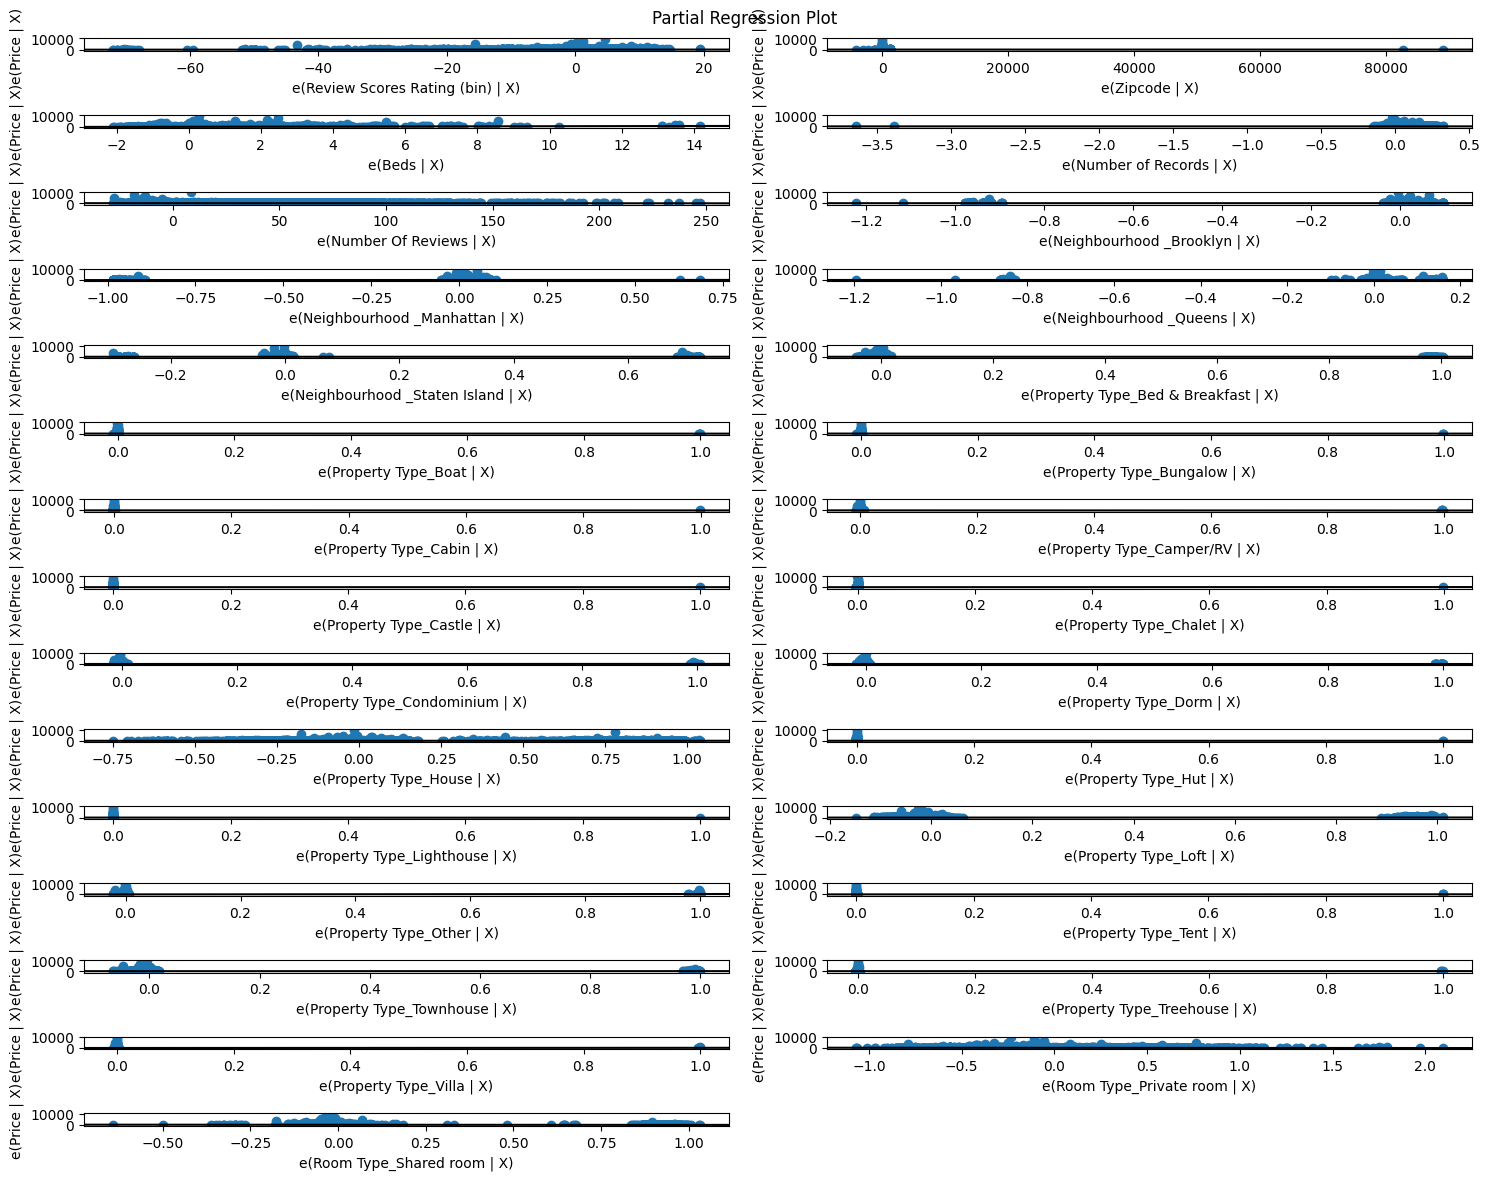

In [37]:
fig = plt.figure(figsize=(15, 12))
sm.graphics.plot_partregress_grid(model_sm, fig=fig)
plt.tight_layout()
plt.show()

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [45]:
X_train_adv['is_entire_home'] = 1 - X_train_adv[['Room Type_Private room', 'Room Type_Shared room']].sum(axis=1)
X_test_adv['is_entire_home'] = 1 - X_test_adv[['Room Type_Private room', 'Room Type_Shared room']].sum(axis=1)



In [49]:
X_train_adv = X_train.copy()
X_test_adv = X_test.copy()

X_train_adv['is_entire_home'] = 1 - X_train_adv[['Room Type_Private room', 'Room Type_Shared room']].sum(axis=1)
X_test_adv['is_entire_home'] = 1 - X_test_adv[['Room Type_Private room', 'Room Type_Shared room']].sum(axis=1)

X_train_adv['log_reviews'] = np.log1p(X_train_adv['Number Of Reviews'])
X_test_adv['log_reviews'] = np.log1p(X_test_adv['Number Of Reviews'])

X_train_adv['log_beds'] = np.log1p(X_train_adv['Beds'])
X_test_adv['log_beds'] = np.log1p(X_test_adv['Beds'])

X_train_adv['beds_x_reviews'] = X_train_adv['Beds'] * X_train_adv['Number Of Reviews']
X_test_adv['beds_x_reviews'] = X_test_adv['Beds'] * X_test_adv['Number Of Reviews']

X_train_adv['entire_home_reviews'] = X_train_adv['is_entire_home'] * X_train_adv['Number Of Reviews']
X_test_adv['entire_home_reviews'] = X_test_adv['is_entire_home'] * X_test_adv['Number Of Reviews']




In [50]:
model_complex = LinearRegression()
model_complex.fit(X_train_adv, y_train)

y_train_pred_adv = model_complex.predict(X_train_adv)
y_test_pred_adv = model_complex.predict(X_test_adv)

train_rmse_adv = np.sqrt(mean_squared_error(y_train, y_train_pred_adv))
test_rmse_adv = np.sqrt(mean_squared_error(y_test, y_test_pred_adv))

train_r2_adv = r2_score(y_train, y_train_pred_adv)
test_r2_adv = r2_score(y_test, y_test_pred_adv)

print("Complex Model Evaluation:")
print("Train RMSE:", round(train_rmse_adv, 2))
print("Test RMSE:", round(test_rmse_adv, 2))
print("Train R²:", round(train_r2_adv, 3))
print("Test R²:", round(test_r2_adv, 3))

Complex Model Evaluation:
Train RMSE: 176.02
Test RMSE: 181.29
Train R²: 0.194
Test R²: 0.214


7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?


After analyzing and interpreting the values derived during this assignment, it was apparent that the complex model performed better on both train and test sets, albeit modestly. It's able to generalize slightly better because there's less overfitting, resulting in more predictive power. Additionally, the added features, such as log transforms and interactions, helped capture nuance in the data. However, it should be noted the overall explanatory power is still low, indicating that other unmeasured variables are influencing price – a sign of underfitting. Thus, the complex model made recognizable strides towards being a robust price-prediction model, but unfortunately to become robust, it still needs more predictive features and flexibility, whereas the model is currently linear.

8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_adv)
X_test_scaled = scaler.transform(X_test_adv)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print("Lasso Model Evaluation:")
print("Train RMSE:", round(train_rmse_lasso, 2))
print("Test RMSE:", round(test_rmse_lasso, 2))
print("Train R²:", round(train_r2_lasso, 3))
print("Test R²:", round(test_r2_lasso, 3))



Lasso Model Evaluation:
Train RMSE: 176.16
Test RMSE: 181.49
Train R²: 0.193
Test R²: 0.212


In [56]:
lasso_features = pd.Series(lasso.coef_, index=X_train_adv.columns)
selected = lasso_features[lasso_features != 0]

print("Selected Features by Lasso:")
print(selected.sort_values(ascending=False))


Selected Features by Lasso:
Beds                          51.015658
is_entire_home                42.140179
Neighbourhood _Manhattan      30.743665
Number Of Reviews             12.658895
Property Type_Other           11.781880
Property Type_Loft             9.124989
Review Scores Rating (bin)     6.165864
Property Type_House            3.774002
Property Type_Condominium      1.941230
Property Type_Villa            1.523428
Property Type_Townhouse        0.414809
Property Type_Lighthouse      -0.008900
Property Type_Camper/RV       -0.836784
Neighbourhood _Queens         -3.280045
Room Type_Shared room         -3.985286
beds_x_reviews               -13.823849
log_reviews                  -17.189895
dtype: float64


The Lasso model performs almost identically to the unregularized complex model, suggesting that many of the original features may not be contributing meaningfully. The slight regularization helps reduce overfitting while keeping the model interpretable. Lasso helped simplify the model by removing weaker predictors and highlighting the core features that influence Airbnb pricing. Although the performance gains were small, the interpretability improved. In future work, tuning the alpha parameter or combining Lasso with feature engineering could further refine the model.